# Testing rpy2: Princals

We first start with setting up the environment and install the required R and Python packages:

In [ ]:
!R -e "install.packages(c('MPsychoR','mirt', 'mice', 'psych', 'eRm', 'ltm'), repos='https://cran.uni-muenster.de', quiet=TRUE)"
!pip install rpy2==3.5.17


R version 4.4.3 (2025-02-28) -- "Trophy Case"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages(c('MPsychoR','mirt', 'mice', 'psych', 'eRm', 'ltm'), repos='https://cran.uni-muenster.de', quiet=TRUE)
> 
> 


In [ ]:
# General imports
import numpy as np
import pandas as pd

# Rpy2 imports
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.packages import importr

# Automatic conversion of arrays and dataframes
pandas2ri.activate()
numpy2ri.activate()

# Set random seed for reproducibility
ro.r('set.seed(123)')

# Ipython extenrsion for magix plotting
%load_ext rpy2.ipython

# R imports
importr('base')
importr('mirt')
importr('MPsychoR')
importr('psych')
importr('stats')
importr('eRm')
importr('ltm')
importr('mice');

## Introduction  
  
In the previous session, the input data had to be dichotomous. Here we present
popular IRT models for polytomously scored items. Again, for all models used
in this session, unidimensionality can be assessed using the tools presented in the last session.



## 1. Rating Scale Model (RSM)

As in the Rasch model, $θ_v$ denotes the person parameter
(the latent trait or ability being measured) and $β_i$ the item location
parameter (corresponding to item's difficulty), here again written as easiness
parameter in order to be consistent with the
specification used in the `eRm` package. Each category h gets a category parameter
ωh, constant across items. This means that item differences are solely reflected by
the shifts in $β_i$ across items. Belonging to the Rasch family, the RSM shares all the
desirable Rasch measurement properties. The downside is that the model is pretty
strict since the same assumptions need to be fulfilled as in the Rasch model.

### The dataset

To illustrate an RSM fit, we use data analyzed in Bond and Fox (2015). The
Children’s Empathic Attitudes Questionnaire (CEAQ; Funk et al., 2008) is a 16-
item scale to measure empathy of late elementary and middle school-aged children.
Each item has three ordered responses: “no” (1), “maybe” (2), and “yes” (3). The
sample size is n = 208. Three covariates (age, gender, grade) were collected as
well. Let us extract the items and set the lowest category to 0 in order to make it
`eRm` compatible ().

### Load, prepare and inspect the dataset

In [ ]:
# Load the data in R
ro.r("data(CEAQ)")

# Get as DataFrame
CEAQ = pandas2ri.rpy2py(ro.globalenv['CEAQ'])

# Subtract 1 from every response to make the dataset eRm compatible
itceaq = CEAQ.iloc[:, :16] - 1

# Inspect the dataset
print(itceaq.head())


   ceaq1  ceaq2  ceaq3  ceaq4  ceaq5  ceaq6  ceaq7  ceaq8  ceaq9  ceaq10  \
1    2.0    2.0    2.0    1.0    2.0    0.0    2.0    2.0    1.0     2.0   
2    1.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0    0.0     2.0   
3    2.0    2.0    2.0    1.0    2.0    1.0    2.0    0.0    2.0     2.0   
4    2.0    1.0    2.0    2.0    1.0    2.0    2.0    0.0    0.0     2.0   
5    2.0    1.0    2.0    2.0    1.0    0.0    2.0    2.0    0.0     2.0   

   ceaq11  ceaq12  ceaq13  ceaq14  ceaq15  ceaq16  
1     2.0     2.0     1.0     2.0     2.0     2.0  
2     2.0     2.0     0.0     2.0     2.0     2.0  
3     1.0     2.0     1.0     2.0     2.0     2.0  
4     2.0     2.0     0.0     2.0     1.0     2.0  
5     1.0     2.0     1.0     2.0     1.0     2.0  


### Fit the model

In [ ]:
# Put data back into R
ro.globalenv['itceaq'] = itceaq

# Fit the model
ro.r("fitrsm <- RSM(itceaq)")

# Get person parameters
ro.r("ppar2 <- person.parameter(fitrsm)")

ifit0 = ro.r("itemfit(ppar2)")
print(ifit0)


Itemfit Statistics: 
         Chisq  df p-value Outfit MSQ Infit MSQ Outfit t Infit t Discrim
ceaq1  210.938 205   0.373      1.024     0.918    0.201  -0.704   0.504
ceaq2  190.205 205   0.763      0.923     0.897   -0.496  -0.977   0.549
ceaq3  259.718 205   0.006      1.261     0.966    1.305  -0.215   0.396
ceaq4  222.146 205   0.196      1.078     0.995    0.724  -0.024   0.289
ceaq5  167.622 205   0.974      0.814     0.864   -1.576  -1.471   0.511
ceaq6  191.085 205   0.749      0.928     0.914   -0.764  -1.055   0.407
ceaq7  162.424 205   0.987      0.788     0.886   -1.506  -1.074   0.588
ceaq8  146.463 205   0.999      0.711     0.738   -3.409  -3.523   0.622
ceaq9  181.586 205   0.879      0.881     0.891   -1.311  -1.373   0.512
ceaq10 380.868 205   0.000      1.849     1.650    3.959   4.549  -0.044
ceaq11 149.579 205   0.999      0.726     0.753   -3.297  -3.342   0.635
ceaq12 192.132 205   0.731      0.933     0.980   -0.424  -0.151   0.589
ceaq13 188.073 205   0.796   

We can compare the p-values across items since the degrees of freedom (df) are constant across the tests. Note
that these $χ^2$-statistics exhibit inflated Type I error rates
(which is problematic because since it could lead to the incorrect
identification of misfitting items). Other measures reported
here are the mean square fit (*MSQ*) statistics related to the amount of misfit in the
original data. They should be within a [0.7, 1.3] interval. Outfit statistics result from
dividing the $χ^2$-value by the corresponding df. Due to their sensitivity to outlying scores,
a modified statistic called *infit* is typically preferred due to its robustness to outliers. Both *infit* and *outfit* can
be standardized t-values which should be between −2 and 2.  
In the output above, which items look problematic?

### Repetition
Item 10 and item 15 have a low p-value and high *outfit/infit*
statistics. Let us eliminate item 10 and item 15 and refit the model.

In [ ]:
itceaqsub = itceaq.drop(itceaq.columns[[9,14]], axis=1)

# Put data back into R
ro.globalenv['itceaqsub'] = itceaqsub

# Fit the model
ro.r("fitrsm2 <- RSM(itceaqsub)")

# Get person parameters
ppar2 = ro.r("ppar2 <- person.parameter(fitrsm2)")

# Get item fit
ifit02 = ro.r("itemfit(ppar2)")
print(ifit02)


Itemfit Statistics: 
         Chisq  df p-value Outfit MSQ Infit MSQ Outfit t Infit t Discrim
ceaq1  225.051 205   0.161      1.092     0.979    0.583  -0.143   0.495
ceaq2  207.044 205   0.447      1.005     0.937    0.084  -0.566   0.553
ceaq3  266.737 205   0.002      1.295     1.018    1.362   0.183   0.412
ceaq4  261.178 205   0.005      1.268     1.111    2.166   1.200   0.273
ceaq5  181.898 205   0.876      0.883     0.938   -0.904  -0.617   0.501
ceaq6  205.813 205   0.471      0.999     0.971    0.024  -0.320   0.408
ceaq7  164.570 205   0.983      0.799     0.922   -1.345  -0.705   0.593
ceaq8  148.237 205   0.999      0.720     0.763   -3.126  -3.044   0.623
ceaq9  188.180 205   0.794      0.913     0.936   -0.871  -0.763   0.508
ceaq11 156.431 205   0.995      0.759     0.792   -2.679  -2.683   0.621
ceaq12 193.162 205   0.713      0.938     0.983   -0.363  -0.126   0.611
ceaq13 185.197 205   0.836      0.899     0.931   -0.956  -0.806   0.526
ceaq14 252.851 205   0.013   

Now there is no item left which shows a suspicious combination of significant p-values
and extreme infit/outfit values. You might notice that the item 3,4 and 14 have significant p-values.

The significant p-values for items 3, 4, and 14 suggest these items might not fit the Rasch model perfectly. This could mean the items are measuring something slightly different from the overall construct being assessed by the questionnaire.
The fact that the other fit statistics (infit, outfit, MSQ) are within acceptable ranges (MSQs 0.7 - 1.3; Outfit > 2.5; Infit -2 - 2) and the discrimination parameters are similar suggests that the misfit of items 3, 4, and 14 might not be severe enough to warrant their removal. \
Therefore, we can include the items, despite their significant p-values.

### Andersen’s LR-test

Let us double-check the model fit using **Andersen’s LR-test**, which has better
inferential properties than the itemfit statistics. It's a statistical test
that assesses whether the item parameters are consistent across different groups
of respondents (in this case, we use grade as splitting criterion).

Note that we have some missing grade values which we impute using the mice
package (van Buuren and Groothuis-Oudshoorn, 2011), since we need to have full
responses on the split criterion. This step would not be necessary if your
dataset does not present missing values.

In [ ]:
ro.r("imp <- mice(CEAQ)")


 iter imp variable
  1   1  age  grade  gender
  1   2  age  grade  gender
  1   3  age  grade  gender
  1   4  age  grade  gender
  1   5  age  grade  gender
  2   1  age  grade  gender
  2   2  age  grade  gender
  2   3  age  grade  gender
  2   4  age  grade  gender
  2   5  age  grade  gender
  3   1  age  grade  gender
  3   2  age  grade  gender
  3   3  age  grade  gender
  3   4  age  grade  gender
  3   5  age  grade  gender
  4   1  age  grade  gender
  4   2  age  grade  gender
  4   3  age  grade  gender
  4   4  age  grade  gender
  4   5  age  grade  gender
  5   1  age  grade  gender
  5   2  age  grade  gender
  5   3  age  grade  gender
  5   4  age  grade  gender
  5   5  age  grade  gender


In [ ]:
ro.r("gradevec <- complete(imp)$grade")

With this code we binarize the grade variable and compute the LR-test. The following code chunk is creating two groups (grades 5-6 and grades 7-8) to compare item parameters between these groups.

In [ ]:
ro.r('levels(gradevec) <- c("grade56", "grade56", "grade78", "grade78")')

LRtest1 = ro.r("LRtest(fitrsm2, gradevec)")
print(LRtest1)


Andersen LR-test: 
LR-value: 23.931 
Chi-square df: 14 
p-value:  0.047 




Even though the p-value is only slightly above 0.05, in conjunction with the itemfit
outcomes, it is safe to assume that the data fit the RSM.

### Exercise: RSM Model Comparison
1. Fit a new RSM model (`fitrsm3`) using the original `itceaq` data (including items 10 and 15).
2. Compare the item fit statistics (`ifit3`) of `fitrsm3` to those of `fitrsm2` (the model without items 10 and 15). Are there any noticeable differences?
3. Conduct Andersen's LR-test on `fitrsm3` using the `gradevec` splitting criterion. Does the model fit improve or worsen compared to `fitrsm2`?

In [ ]:
# Fit the model
ro.r("fitrsm3 <- RSM(itceaq)")

# Get person parameters
ppar3 = ro.r("ppar3 <- person.parameter(fitrsm3)")

# Get item fit
ifit03 = ro.r("itemfit(ppar3)")
print(ifit03)

ro.r("imp2 <- mice(CEAQ)")
ro.r("gradevec2 <- complete(imp2)$grade")

ro.r('levels(gradevec2) <- c("grade56", "grade56", "grade78", "grade78")')

LRtest2 = ro.r("LRtest(fitrsm3, gradevec2)")
print(LRtest2)


Itemfit Statistics: 
         Chisq  df p-value Outfit MSQ Infit MSQ Outfit t Infit t Discrim
ceaq1  210.938 205   0.373      1.024     0.918    0.201  -0.704   0.504
ceaq2  190.205 205   0.763      0.923     0.897   -0.496  -0.977   0.549
ceaq3  259.718 205   0.006      1.261     0.966    1.305  -0.215   0.396
ceaq4  222.146 205   0.196      1.078     0.995    0.724  -0.024   0.289
ceaq5  167.622 205   0.974      0.814     0.864   -1.576  -1.471   0.511
ceaq6  191.085 205   0.749      0.928     0.914   -0.764  -1.055   0.407
ceaq7  162.424 205   0.987      0.788     0.886   -1.506  -1.074   0.588
ceaq8  146.463 205   0.999      0.711     0.738   -3.409  -3.523   0.622
ceaq9  181.586 205   0.879      0.881     0.891   -1.311  -1.373   0.512
ceaq10 380.868 205   0.000      1.849     1.650    3.959   4.549  -0.044
ceaq11 149.579 205   0.999      0.726     0.753   -3.297  -3.342   0.635
ceaq12 192.132 205   0.731      0.933     0.980   -0.424  -0.151   0.589
ceaq13 188.073 205   0.796   

### Wald Test

Note that another option for testing at an item-category level is to use the
Waldtest function which computes a p-value for each item-category parameter.
There is no clear rule for situations where, for instance, two item-category parameters
are significant and two are not significant. Whether such an item should be
eliminated or not depends on how strict we want to be when constructing the scale.

As a general *rule of thumb*, significant p-values indicate that the item-category
parameters for some items differ significantly from the average,
suggesting that the RSM's assumption of equal category parameters might not hold perfectly.

In [ ]:
fitWald = ro.r("Waldtest(fitrsm2, gradevec)")
print(fitWald)


Wald test on item level (z-values):

               z-statistic p-value
beta ceaq1.c1        0.368   0.713
beta ceaq1.c2       -0.037   0.971
beta ceaq2.c1        0.343   0.732
beta ceaq2.c2       -0.084   0.933
beta ceaq3.c1       -0.446   0.656
beta ceaq3.c2       -0.808   0.419
beta ceaq4.c1       -1.804   0.071
beta ceaq4.c2       -2.085   0.037
beta ceaq5.c1        0.120   0.905
beta ceaq5.c2       -0.325   0.745
beta ceaq6.c1       -2.362   0.018
beta ceaq6.c2       -2.348   0.019
beta ceaq7.c1       -0.465   0.642
beta ceaq7.c2       -0.863   0.388
beta ceaq8.c1       -1.453   0.146
beta ceaq8.c2       -1.683   0.092
beta ceaq9.c1       -0.909   0.364
beta ceaq9.c2       -1.166   0.244
beta ceaq11.c1       1.421   0.155
beta ceaq11.c2       0.765   0.444
beta ceaq12.c1       2.953   0.003
beta ceaq12.c2       2.465   0.014
beta ceaq13.c1       0.400   0.689
beta ceaq13.c2      -0.067   0.947
beta ceaq14.c1       1.315   0.188
beta ceaq14.c2       0.932   0.351
beta ceaq16.c1   

You see that there some items with significant p-values, meaning that the category parameters are not the same for all items (as it is assumed by the RSM).
Still, the overall fit of the model and the other item fit statistics indicate that the RSM is still a reasonable model for the data

### Inspect and interpret item paramters

In [ ]:
fitrsm2 = ro.globalenv["fitrsm2"]
print(fitrsm2)


Results of RSM estimation: 

Call:  RSM(X = itceaqsub) 

Conditional log-likelihood: -1769.877 
Number of iterations: 19 
Number of parameters: 14 

Item (Category) Difficulty Parameters (eta):
              ceaq2      ceaq3       ceaq4      ceaq5    ceaq6      ceaq7
Estimate -0.6525542 -1.3134847 0.006084797 -0.2649996 1.308416 -0.6879837
Std.Err   0.1283175  0.1529035 0.113368383  0.1184045 0.111101  0.1293845
             ceaq8     ceaq9    ceaq11     ceaq12    ceaq13     ceaq14
Estimate 0.6502727 1.1905610 0.9799874 -0.6701963 1.5363996 -1.1251567
Std.Err  0.1077147 0.1098345 0.1082772  0.1288454 0.1143261  0.1448551
              ceaq16     Cat 2
Estimate -0.06293832 1.4637785
Std.Err   0.11450242 0.1065537





In this example, let us proceed with the fitrsm2 model. The item parameters
shown in the print or summary output are difficult to interpret. Let us convert
them into **threshold** parameters. \
The **threshold** parameters are more intuitive because they represent the points on the latent trait scale where the probability of responding in a higher category exceeds the probability of responding in a lower category.

In [ ]:
thpar = ro.r("thresholds(fitrsm2)")
print(thpar)


Design Matrix Block 1:
       Location Threshold 1 Threshold 2
ceaq1  -0.16252    -0.89441     0.56937
ceaq2   0.07934    -0.65255     0.81122
ceaq3  -0.58160    -1.31348     0.15029
ceaq4   0.73797     0.00608     1.46986
ceaq5   0.46689    -0.26500     1.19878
ceaq6   2.04031     1.30842     2.77219
ceaq7   0.04391    -0.68798     0.77579
ceaq8   1.38216     0.65027     2.11405
ceaq9   1.92245     1.19056     2.65434
ceaq11  1.71188     0.97999     2.44377
ceaq12  0.06169    -0.67020     0.79358
ceaq13  2.26829     1.53640     3.00018
ceaq14 -0.39327    -1.12516     0.33862
ceaq16  0.66895    -0.06294     1.40084




We get a location parameter for each item and k − 1 threshold parameters (with k being the number of categories in each item).
The threshold parameters reflect the point on the empathy trait
continuum where a respondent would switch from scoring 0 to scoring 1 (first
parameter) and would switch from scoring 1 to scoring 2 (second parameter).

While location parameter represents the overall difficulty of the item, the threshold
parameters represent the relative difficulty of moving from one category to the next.

Using the plotICC function such curves can be produced for each item. Note
that for polytomous models, we get a curve for each item category (item-category
characteristic curves). These curves show the probability of responding in each
category as a function of the latent trait. Lets plot the ICC for the first item.

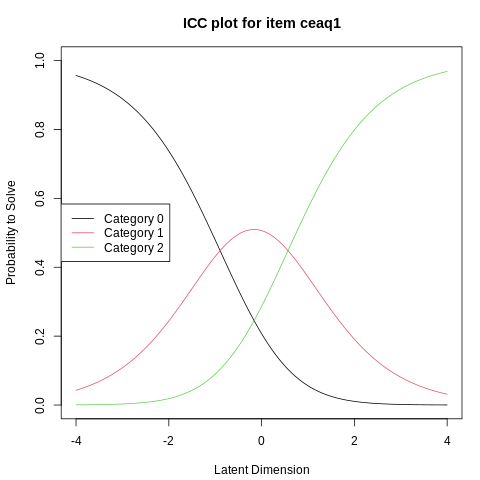

In [ ]:
%%R
plotICC(fitrsm2, item.subset = 1)

Another plotting option, which summarizes nicely the entire set of parameter
estimates, is the person-item map.

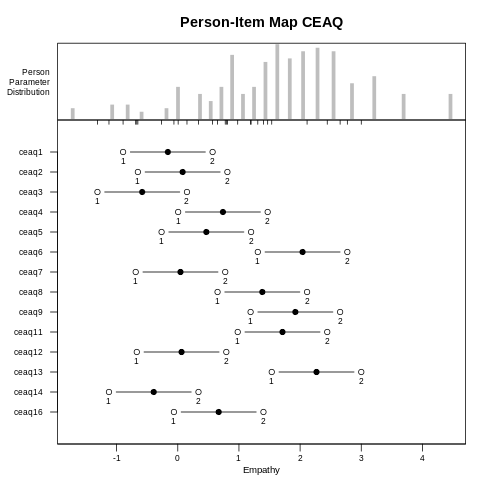

In [ ]:
%%R
plotPImap(fitrsm2, latdim = "Empathy", main = "Person-Item Map CEAQ")

As this plot nicely illustrates, item differences occur due to location shifts only.
That is, we fit one set of threshold parameters for all items, which is then shifted
across the items via the location parameter. This means that RSM assumes  the relative distances between the response categories to be the same for all items, which is a strong assumption that might not always hold in practice.
This is a main feature of the RSM and will be relaxed in the next section.

### Test your understanding

- Based on the thpar output, which item appears to be the easiest? Which appears to be the most difficult? Discuss with your collegues.
- Looking at the person-item map, are there any respondents who seem to have very high or very low levels of empathy? How can you tell?

## 2. Partial Credit Model

The partial credit model (PCM; Masters, 1982) is a generalization of the RSM
where we estimate specific item-category parameters for each item. Items do not
need to have the same number of categories. Master’s motivation was to develop
a model suited for partial credit scenarios (e.g., 0 = “totally wrong,” 1 = “partially
correct,” 2 = “almost correct,” 3 = “correct”).  
Apart from potentially differing numbers of categories, the most striking difference
between the PCM and RSM is that each item-category gets its own item-category
parameter $β_{ih}$. As the RSM, the PCM belongs to the Rasch family as well and the
three Rasch assumptions need to be fulfilled. The PCM can be fitted using the eRm
package, and itemfit can be assessed in the same way as we did for the RSM.

### The dataset

To illustrate the PCM, we use a dataset from Koller et al. (2017) who analyzed
the Adult Self-Transcendence Inventory (ASTI; Levenson et al., 2005), a self-report
scale measuring the target construct of wisdom. The ASTI has five subscales: selfknowledge
and integration (SI), peace of mind (PM), non-attachment (NA), selftranscendence
(ST), and presence in the here-and-now and growth (PG). Let us
analyze the PG subscale by means of a PCM. This subscale has six items; four
of them are on a 3-point scale and two of them on a 4-point scale.

### Load and inspect the dataset

In [ ]:
# Load the data in R
ro.r("data(ASTI)")

# Convert data to a Pandas df
ASTI = pandas2ri.rpy2py(ro.globalenv['ASTI'])

# Extract PG items
PGitems = ASTI.iloc[:, [10, 13, 14, 16, 17, 22]]

# Inspect the dataset
print(PGitems.head())

# Put data back into R
ro.globalenv['PGitems'] = PGitems


   ASTI11  ASTI14  ASTI15  ASTI17  ASTI18  ASTI23
1     2.0     2.0     1.0     0.0     1.0     2.0
2     2.0     3.0     2.0     2.0     2.0     1.0
3     1.0     2.0     1.0     2.0     2.0     2.0
4     1.0     1.0     2.0     0.0     3.0     2.0
5     0.0     0.0     1.0     1.0     2.0     2.0


### Fit the model

In [ ]:
ro.r('fitpcm <- PCM(PGitems)')

thresh = ro.r("thresholds(fitpcm)")
print(thresh)


Design Matrix Block 1:
       Location Threshold 1 Threshold 2 Threshold 3
ASTI11 -0.25342    -0.95748     0.45065          NA
ASTI14  0.55114    -0.36856     0.14314     1.87882
ASTI15 -0.23452    -1.10152     0.63248          NA
ASTI17  0.36189    -0.03309     0.75686          NA
ASTI18  0.60182    -0.60759     0.53785     1.87519
ASTI23  0.26095    -0.36529     0.88720          NA




The four items with three response categories get two threshold parameters only.
Goodness-of-fit evaluation is not shown here but can be performed in the same
manner as for the RSM.

### Person-item map and ICCs

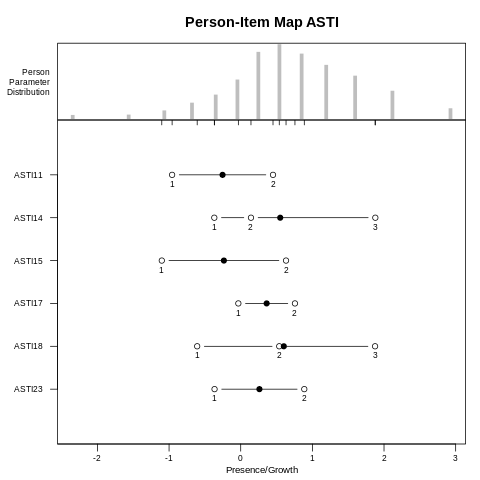

In [ ]:
%%R
plotPImap(fitpcm, latdim = "Presence/Growth", main = "Person-Item Map ASTI")

As opposed to the RSM, the distances between the category thresholds vary
across items. Note that sometimes it can happen that two threshold parameters
appear to be switched in the PI-map. In this case, a look at the corresponding ICC
plot helps. For instance, if the threshold 2 is lower than the threshold 1, this means
nowhere on the latent trait a category 2 has an endorsement probability higher than
the remaining categories. This isn't the case here but we can still look at the ICCs with the following command.  
Tipp: To display the ICC not only for one item (here ASTI18), but for all items, you can use `item.subset = "all"`.

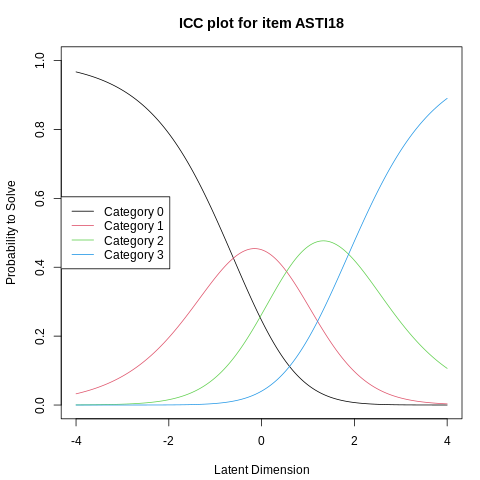

In [ ]:
%%R
plotICC(fitpcm, item.subset = 5)

### Exercise PCM Item Difficulty Comparison
1. Extract the item location parameters (difficulty) from the `fitpcm` model.
2. Identify the two items with the highest and lowest difficulty parameters.
3. Plot the item characteristic curves (`ICCs`) for these two items on the same graph.
4. Interpret the plot. How do the `ICCs` reflect the difference in difficulty between the two items?

In [ ]:
# Load the data in R
ro.r("data(ASTI)")

# Convert data to a Pandas df
ASTI = pandas2ri.rpy2py(ro.globalenv['ASTI'])

# Extract PG items
PGitems = ASTI.iloc[:, [10, 13, 14, 16, 17, 22]]

# Inspect the dataset
print(PGitems.head())

# Put data back into R
ro.globalenv['PGitems'] = PGitems


ro.r('fitpcm <- PCM(PGitems)')
thresh = ro.r("thresholds(fitpcm)")
print(thresh) # Item ASTI23 & ASTI14 (highest & lowest threshold 2)

   ASTI11  ASTI14  ASTI15  ASTI17  ASTI18  ASTI23
1     2.0     2.0     1.0     0.0     1.0     2.0
2     2.0     3.0     2.0     2.0     2.0     1.0
3     1.0     2.0     1.0     2.0     2.0     2.0
4     1.0     1.0     2.0     0.0     3.0     2.0
5     0.0     0.0     1.0     1.0     2.0     2.0

Design Matrix Block 1:
       Location Threshold 1 Threshold 2 Threshold 3
ASTI11 -0.25342    -0.95748     0.45065          NA
ASTI14  0.55114    -0.36856     0.14314     1.87882
ASTI15 -0.23452    -1.10152     0.63248          NA
ASTI17  0.36189    -0.03309     0.75686          NA
ASTI18  0.60182    -0.60759     0.53785     1.87519
ASTI23  0.26095    -0.36529     0.88720          NA




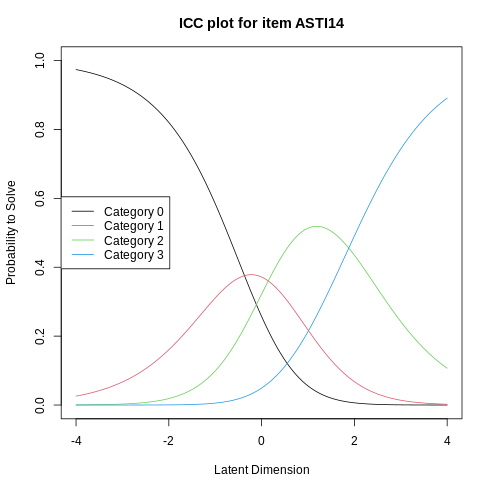

In [ ]:
%%R
plotICC(fitpcm, item.subset = 2)

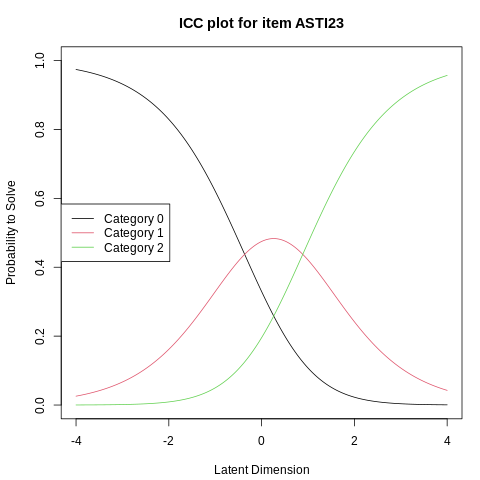

In [ ]:
%%R
plotICC(fitpcm, item.subset = 6)

### Test your understanding

- Examine the person-item map for the PCM. Do the item difficulties seem to cover the range of person abilities well? Are there any gaps?
- Choose one item and interpret its thresholds. What does it mean for a person to have a trait level above the first threshold but below the second?
- The PCM allows for different numbers of response categories per item. How might this flexibility be useful in designing a questionnaire?

## 3. Generalized Partial Credit Model

An extension of the PCM was proposed by Muraki (1992): the generalized
partial credit model (GPCM). Similar two a 2-PL model, it adds item discrimination parameters $α_i$ to the
model. The $α_i$ parameter, enables the ICCs to have varying slopes (in PCM the slopes (= discrimination power) are assumed to be the same)
Whereas the PCM belongs to the Rasch family, the GPCM does not. The
GPCM can be fitted using the ltm package via the gpcm function. This function
allows us to put restrictions on the discrimination parameters. For instance, setting `constraint="rasch"`,
we end up with a PCM. Thus, the PCM is nested within
a GPCM. We can use this property for constructing an LR-test.  

### The dataset

Let us illustrate this PCM/GPCM strategy using the ASTI data once more, but
this time using a different subscale: self-transcendence (ST) with seven polytomous
items.

### Load and inspect the dataset

In [ ]:
# Load the data in R
ro.r("data(ASTI)")

# Convert data to a Pandas df
ASTI = pandas2ri.rpy2py(ro.globalenv['ASTI'])

# Extract ST items
STitems = ASTI.iloc[:, [1,3,7,12,15,23,24]]

# Inspect the dataset
print(STitems.head())

# Put data back into R
ro.globalenv['STitems'] = STitems

   ASTI2  ASTI4  ASTI8  ASTI13  ASTI16  ASTI24  ASTI25
1    2.0    3.0    1.0     2.0     3.0     0.0     2.0
2    2.0    2.0    1.0     2.0     2.0     1.0     1.0
3    1.0    1.0    2.0     2.0     1.0     1.0     2.0
4    2.0    3.0    2.0     2.0     3.0     0.0     1.0
5    3.0    3.0    1.0     2.0     3.0     1.0     0.0


### Fit the model

In [ ]:
ro.r('stpcm <- gpcm(STitems, constraint = "rasch")') #PCM

ro.r('stgpcm <- gpcm(STitems)') #GPCM

print(ro.r('summary(stpcm)'))
print(ro.r('summary(stgpcm)'))

#ro.r('anova(stpcm, stgpcm)') #LR-test # CHECK


Call:
gpcm(data = STitems, constraint = "rasch")

Model Summary:
   log.Lik      AIC      BIC
 -9286.113 18610.23 18705.78

Coefficients:
$ASTI2
         value std.err z.value
Catgr.1 -1.452   0.114 -12.784
Catgr.2 -0.545   0.082  -6.639
Catgr.3  1.198   0.092  12.990
Dscrmn   1.000      NA      NA

$ASTI4
         value std.err z.value
Catgr.1 -1.824   0.125 -14.559
Catgr.2 -0.619   0.080  -7.688
Catgr.3  1.375   0.094  14.654
Dscrmn   1.000      NA      NA

$ASTI7
         value std.err z.value
Catgr.1 -1.070   0.097 -11.024
Catgr.2 -0.093   0.082  -1.136
Catgr.3  1.393   0.103  13.584
Dscrmn   1.000      NA      NA

$ASTI13
         value std.err z.value
Catgr.1 -1.276   0.096 -13.299
Catgr.2  0.010   0.076   0.135
Dscrmn   1.000      NA      NA

$ASTI16
         value std.err z.value
Catgr.1 -1.531   0.108 -14.127
Catgr.2 -0.217   0.080  -2.726
Catgr.3  1.358   0.099  13.762
Dscrmn   1.000      NA      NA

$ASTI24
        value std.err z.value
Catgr.1 -0.57   0.077  -7.409
Catgr.2

We see that the GPCM fits better than the PCM. AIC (PCM = 18610.23 GCPM = 18190.04) and BIC (PCM = 18705.78 GCPM = 18320.79) are clearly lower for the GPCM compared to the PCM.

### ICCs

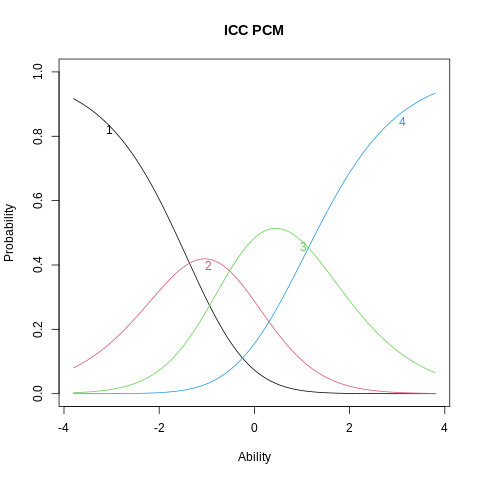

In [ ]:
%%R
plot(stpcm, main = "ICC PCM", items = 1)

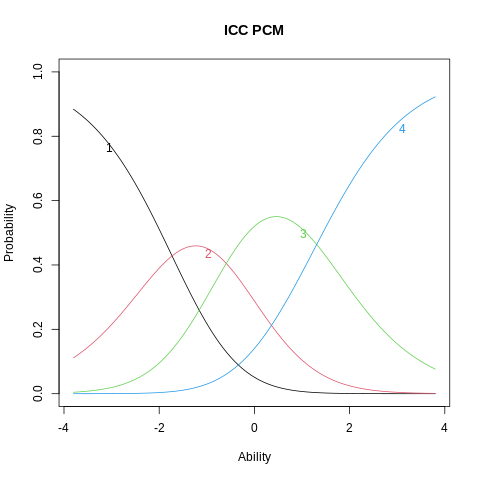

In [ ]:
%%R
plot(stpcm, main = "ICC PCM", items = 2)

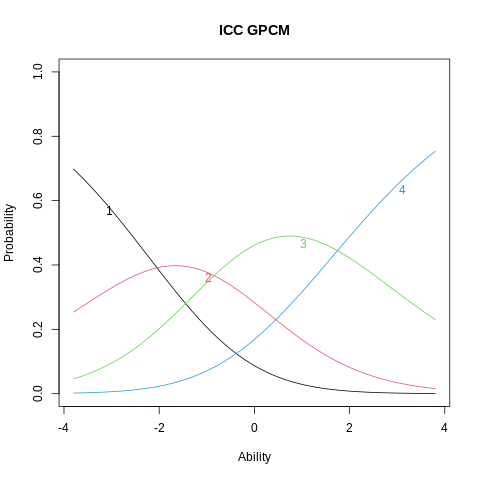

In [ ]:
%%R
plot(stgpcm, main = "ICC GPCM", items = 1)

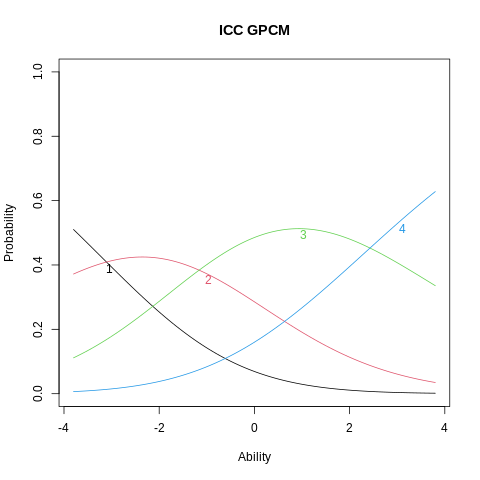

In [ ]:
%%R
plot(stgpcm, main = "ICC GPCM", items = 2)

The ICCs show the difference between the PCM and the GPCM. The first two panels present the ICCs for 2 items based on a PCM fit. We see that the ICC slopes within and across items are constant. The ICCs for these items look very similar, but they are not exactly the same. The lower panels contain the ICCs for 2 items from the GPCM fit. The slopes vary across items; within each item, they are the same. This variation is due to the $α_i$ added to the model.

### Test your understanding

- Based on the  comparison of the PCM and GPCM, why might the GPCM be a better fit for the ST items?

- Examine the ICC plots for both models. How does the inclusion of discrimination parameters in the GPCM change the interpretation of item difficulty and discrimination?

- In what situations might you prefer to use a PCM even if the GPCM fits the data slightly better?

### Exercise: GPCM Discrimination Exploration
1. Extract the item discrimination parameters (`disc`) from the `stgpcm` model.
2. Identify the item with the highest discrimination parameter.
3. Identify the item with the worst discrimination paramenter.
4. Plot the two item and compare them.

In [ ]:
# Load the data in R
ro.r("data(ASTI)")

# Convert data to a Pandas df
ASTI = pandas2ri.rpy2py(ro.globalenv['ASTI'])

# Extract ST items
STitems = ASTI.iloc[:, [1,3,6,12,15,23,24]]

# Inspect the dataset
print(STitems.head())

# Put data back into R
ro.globalenv['STitems'] = STitems

# Fit the model
ro.r('stgpcm <- gpcm(STitems)') #GPCM

# Extract discrimination parameters
coeffs = ro.r('stgpcm$coef')
print(coeffs)

# If we don't want to select the maximum and minimum by hand:
# Convert R list to Python dictionary
coeffs_dict = {key: list(value) for key, value in zip(coeffs.names, coeffs)}

# Extract last value of each discrimination parameter
disc_para = pd.DataFrame({'disc': [values[-1] for values in coeffs_dict.values()]})

# Display the final DataFrame
print(disc_para)

# Find max and min discrimination values
max_disc = disc_para.loc[disc_para['disc'].idxmax()]
min_disc = disc_para.loc[disc_para['disc'].idxmin()]

# Print results
print("Max Discrimination Parameter:")
print(max_disc)

print("\nMin Discrimination Parameter:")
print(min_disc)

   ASTI2  ASTI4  ASTI7  ASTI13  ASTI16  ASTI24  ASTI25
1    2.0    3.0    2.0     2.0     3.0     0.0     2.0
2    2.0    2.0    2.0     2.0     2.0     1.0     1.0
3    1.0    1.0    0.0     2.0     1.0     1.0     2.0
4    2.0    3.0    2.0     2.0     3.0     0.0     1.0
5    3.0    3.0    3.0     2.0     3.0     1.0     0.0
$ASTI2
   Catgr.1    Catgr.2    Catgr.3     Dscrmn 
-1.3374681 -0.3841643  1.0106892  2.2824796 

$ASTI4
   Catgr.1    Catgr.2    Catgr.3     Dscrmn 
-3.1293782 -1.1749336  2.4453829  0.4520975 

$ASTI7
    Catgr.1     Catgr.2     Catgr.3      Dscrmn 
-0.99931831 -0.03769178  1.17269927  2.77475284 

$ASTI13
   Catgr.1    Catgr.2     Dscrmn 
-3.8623654 -0.4040226  0.2307232 

$ASTI16
   Catgr.1    Catgr.2    Catgr.3     Dscrmn 
-2.6819202 -0.4040134  2.3897500  0.4344583 

$ASTI24
   Catgr.1    Catgr.2     Dscrmn 
-1.3975288  3.6983803  0.2833939 

$ASTI25
   Catgr.1    Catgr.2    Catgr.3     Dscrmn 
-2.8231661 -0.1662263  3.0660488  0.3704399 


       disc
0  

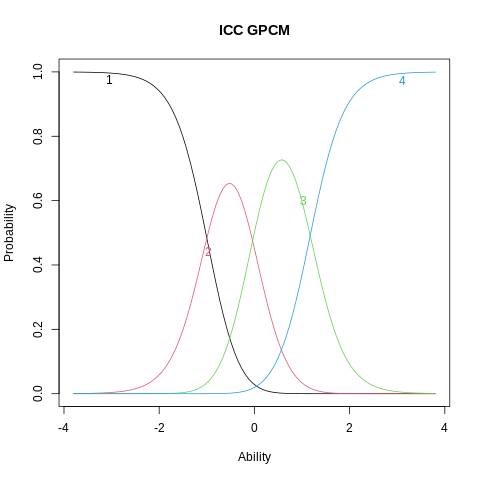

In [ ]:
%%R
plot(stgpcm, main = "ICC GPCM", items =3) # maximum dscm parameter. Watchout: R starts counting at 1

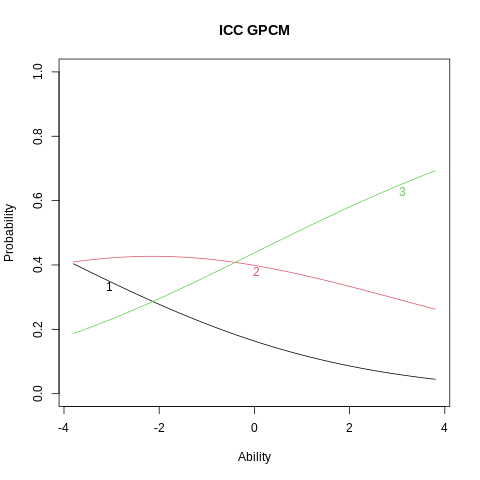

In [ ]:
%%R
plot(stgpcm, main = "ICC GPCM", items = 4) # minimum dscm parameter. Watchout: R starts counting at 1

###Interpretation
The item with the higher discrimination parameter will have a steeper ICC curve. This indicates that the item is better at differentiating between individuals with higher and lower levels of the latent trait. The item with the lower discrimination parameter will have a flatter ICC curve.
This means the item is less effective at distinguishing between individuals with different trait levels. The responses to this item are less strongly related to the overall trait being measured.

## 4. Graded Response Model

Another popular polytomous IRT model, similar to the GPCM in terms of including
discrimination parameters, is the graded response model (GRM; Samejima, 1969).  
The GRM estimates the probability for scoring category h
or higher, whereas the GPCM estimates the probability for scoring exactly in category h.
The $β_{ih}$ parameter is often referred to as category boundary location. As
in the PCM/GPCM, the items can have different numbers of categories. A GRM can be fitted using the ltm package.

### The dataset

We illustrate the GRM on the self-transcendence (ST) subscale from the ASTI data, already used in the GPCM fit.

### Fit the model

In [ ]:
# Fit the model
ro.r('fitgrm <- grm(STitems)')

# Estimate person parameter
ro.r('ppargrm <- ltm::factor.scores(fitgrm)')

### OCCs and ICCs

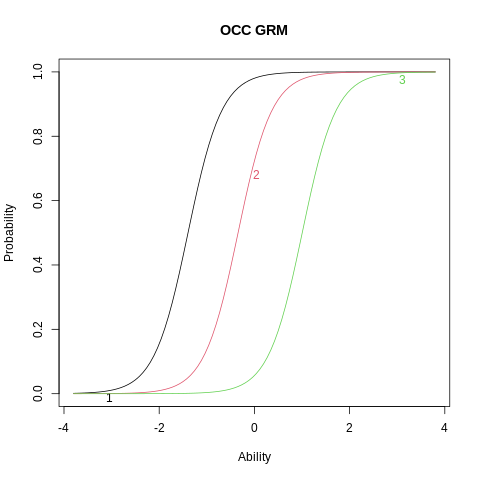

In [ ]:
%%R
plot(fitgrm, type="OCCu", items = 1, main = "OCC GRM")

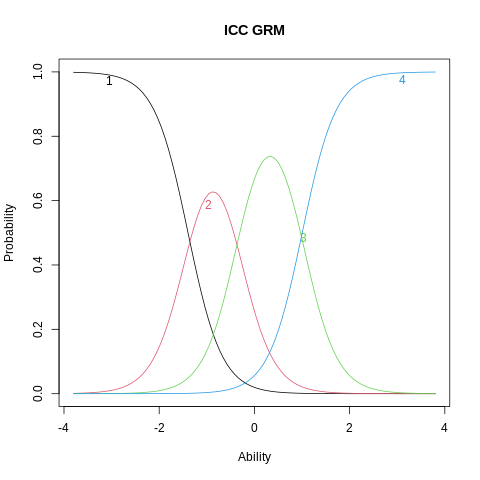

In [ ]:
%%R
plot(fitgrm, type = "ICC", items = 1, main = "ICC GRM")

The upper panel shows the operation characteristic curves (OCC).
The first curve (from left to right) reflects the probability for scoring 1 or higher,
the second curve the probability for scoring 2 or higher, and the third curve the
probability for scoring 3. The lower panel shows the ICC version of it, produced
using `plot(fitgrm, type = "ICC")`.

The lower panel shows the ICCs. Each line represents the probability of choosing the given category (same as in GPCM).

### Test your understanding

- Interpret the OCC plot for the first item. What does it tell you about the probabilities of responding in each category at different trait levels?
- Compare the ICC plot for the GRM to the ICC plot for the GPCM. How do they differ in their interpretation?
- The GRM is often used in educational settings. Can you think of an example where the GRM might be more appropriate than the PCM or GPCM?